In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
#https://www.kaggle.com/datasets/gauravduttakiit/coffee-leaf-diseases?select=test

In [41]:
BATCH_SIZE = 32
IMAGE_SIZEx = 256
IMAGE_SIZEy=256
CHANNELS=3
EPOCHS=50

#  I'll use data from 'train' to train and validate the model, and use data from 'test' to run some test using the model created

In [42]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/ASUS/OneDrive/Desktop/Coffee_final/train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZEx,IMAGE_SIZEy),
    batch_size=BATCH_SIZE
)


Found 1264 files belonging to 4 classes.


In [43]:
class_names = dataset.class_names
class_names

['miner', 'nodisease', 'phoma', 'rust']

In [44]:
len(dataset)

40

In [45]:
train_size = 0.8
len(dataset)*train_size

32.0

In [46]:
train_ds = dataset.take(13)
len(train_ds)

13

In [47]:
test_ds = dataset.skip(13)
len(test_ds)

27

In [9]:
val_size=0.1
len(dataset)*val_size

4.0

In [48]:
val_ds = test_ds.take(1)
len(val_ds)

1

In [49]:
test_ds = test_ds.skip(1)
len(test_ds)

26

In [50]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [51]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [52]:
len(train_ds)

32

In [53]:
len(val_ds)

4

In [54]:
len(test_ds)

4

In [55]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [56]:
from tensorflow.keras import models, layers
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZEx, IMAGE_SIZEy),
  layers.Rescaling(1./255),
])

In [57]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [58]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [59]:
import tensorflow as tf
from tensorflow.keras import models, layers
CHANNELS = 3

input_shape = (BATCH_SIZE, IMAGE_SIZEx, IMAGE_SIZEy, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [60]:
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [62]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
    callbacks=[early_stopping]
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 909ms/step - accuracy: 0.2858 - loss: 1.3838 - val_accuracy: 0.3125 - val_loss: 1.3672
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 745ms/step - accuracy: 0.3217 - loss: 1.3551 - val_accuracy: 0.3828 - val_loss: 1.2225
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 731ms/step - accuracy: 0.4631 - loss: 1.1683 - val_accuracy: 0.5000 - val_loss: 1.0676
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 730ms/step - accuracy: 0.5276 - loss: 1.0299 - val_accuracy: 0.5469 - val_loss: 0.9664
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 729ms/step - accuracy: 0.5581 - loss: 0.9513 - val_accuracy: 0.6250 - val_loss: 0.8613
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 732ms/step - accuracy: 0.6404 - loss: 0.8407 - val_accuracy: 0.7344 - val_loss: 0.6679
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 736ms/step - accuracy: 0.7079 - loss: 0.7248 - val_accuracy: 0.7031 - val_loss: 0.6894
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 735ms/step - accuracy: 0.7633 - loss: 0.6308 - val_accu

In [63]:
model.save('C:/Users/ASUS/OneDrive/Desktop/Coffee_final/coffee_model11.h5')

In [64]:
scores = model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.9854 - loss: 0.0570


In [65]:
scores


[0.035399630665779114, 0.9921875]

In [66]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 32}

In [67]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [68]:
type(history.history['loss'])


list

In [69]:
len(history.history['accuracy'])


30

In [70]:
history.history['val_accuracy']

[0.3125,
 0.3828125,
 0.5,
 0.546875,
 0.625,
 0.734375,
 0.703125,
 0.8359375,
 0.859375,
 0.8046875,
 0.9140625,
 0.90625,
 0.9296875,
 0.90625,
 0.9296875,
 0.890625,
 0.96875,
 0.9375,
 0.984375,
 0.8828125,
 0.96875,
 0.984375,
 0.9921875,
 0.96875,
 0.9765625,
 0.9453125,
 0.953125,
 0.984375,
 0.9921875,
 0.9921875]

In [71]:
history.history['loss'][:5]

[1.3801456689834595,
 1.3298662900924683,
 1.160516619682312,
 1.01572585105896,
 0.9149994254112244]

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


ValueError: x and y must have same first dimension, but have shapes (10,) and (30,)

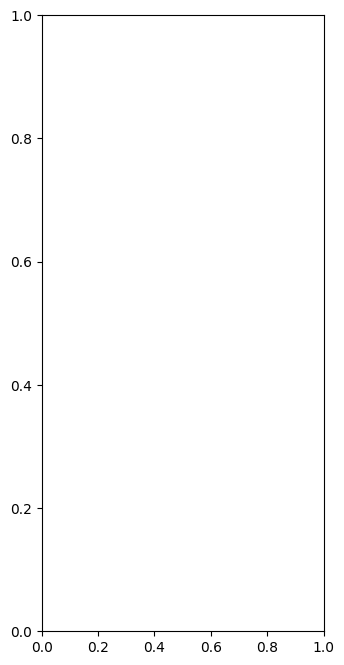

In [73]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.plot(range(30), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label='Training Loss')
plt.plot(range(30), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: miner
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
predicted label: miner


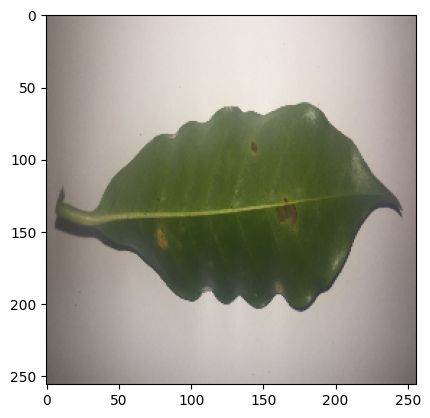

In [39]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 45ms/step


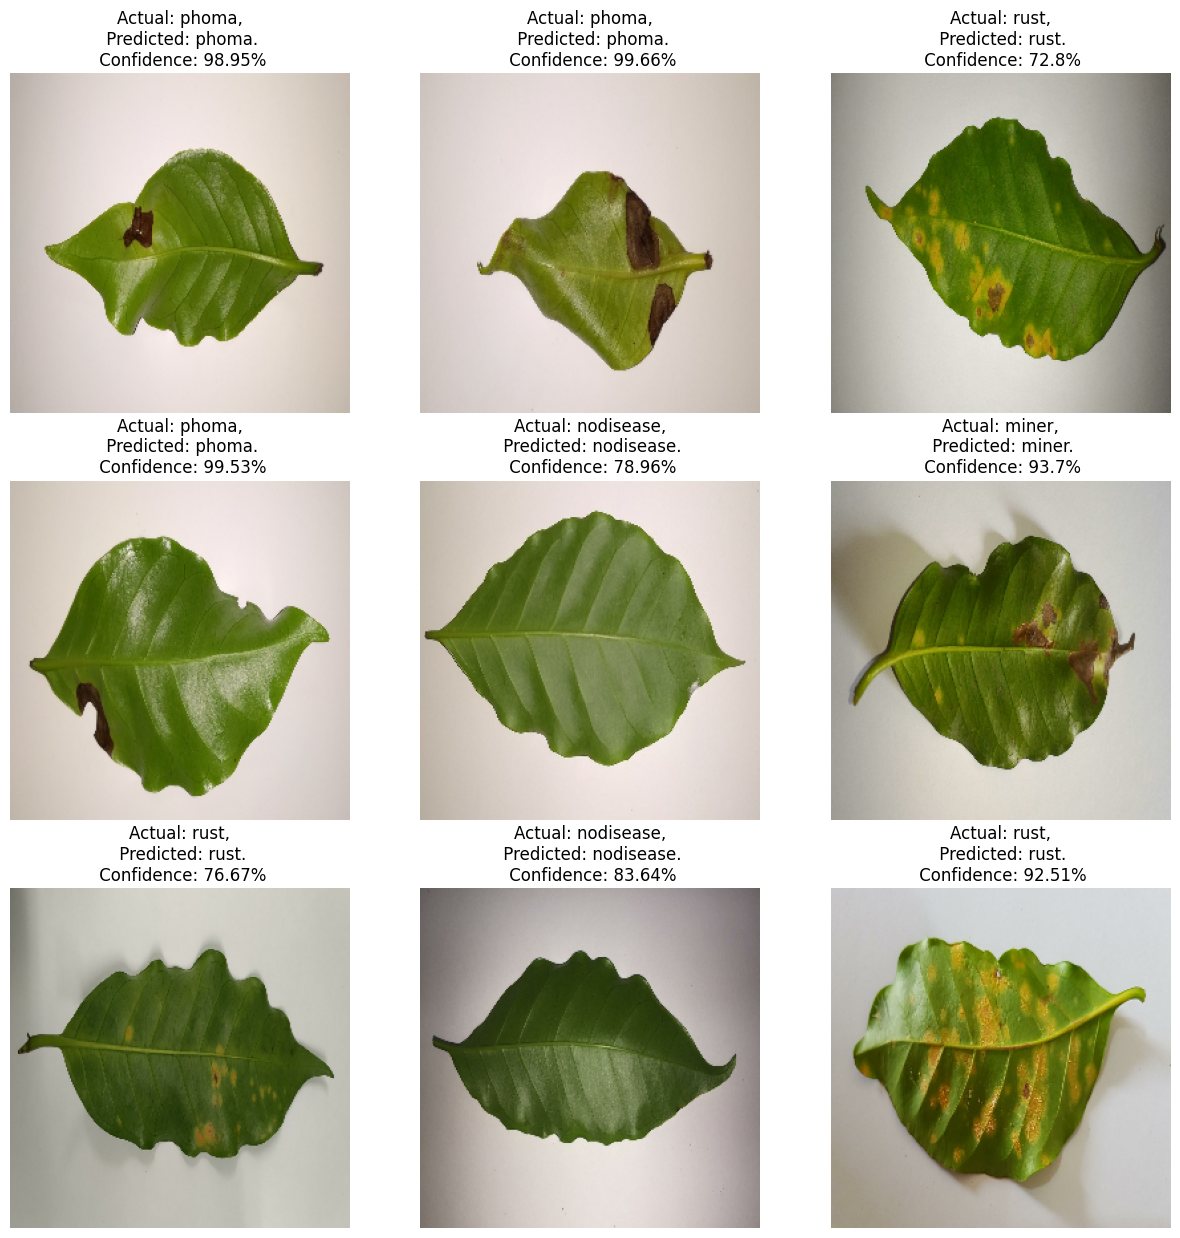

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [40]:
model_version = 20
model.save("//content/drive/MyDrive/Coffee_leaf/model_{}.h5".format(model_version))

# Some tests using unseen data from 'test' directory

1/1 [==============================] - 0s 245ms/step


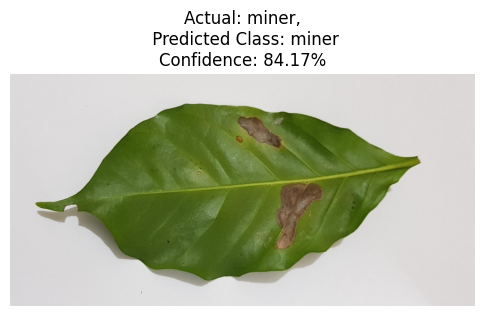

1/1 [==============================] - 0s 112ms/step


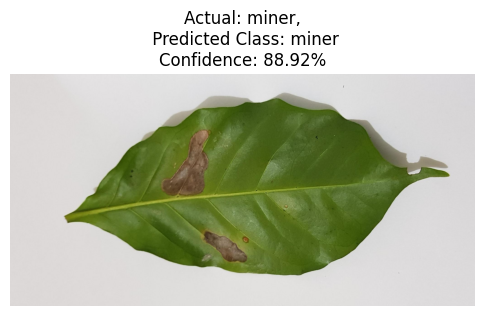

1/1 [==============================] - 0s 46ms/step


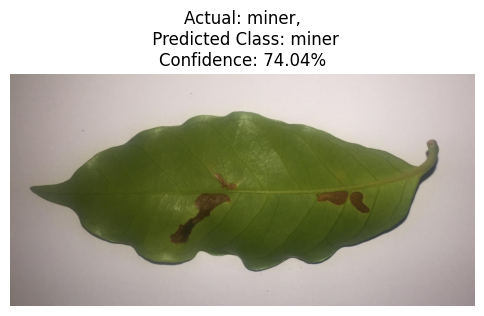

1/1 [==============================] - 0s 59ms/step


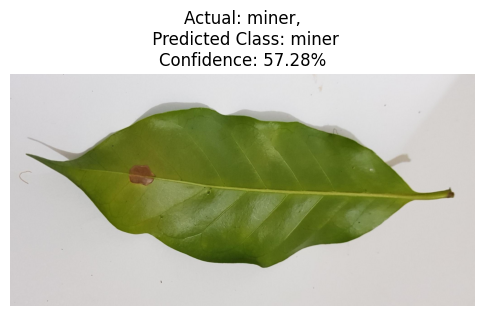

1/1 [==============================] - 0s 53ms/step


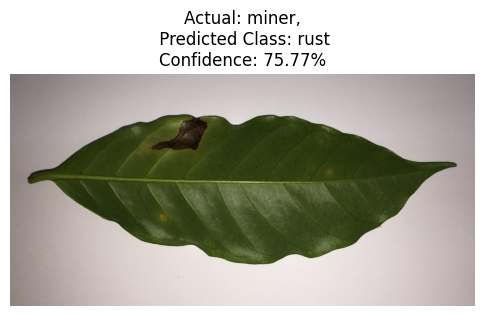

1/1 [==============================] - 0s 46ms/step


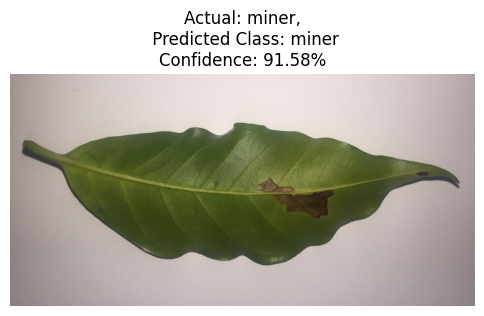

1/1 [==============================] - 0s 48ms/step


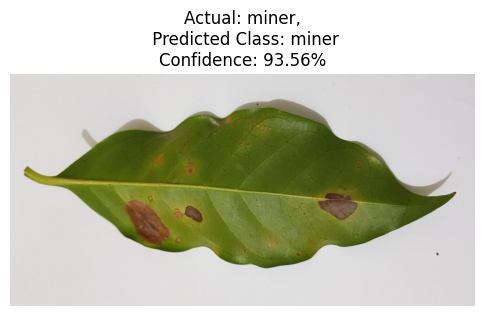

1/1 [==============================] - 0s 47ms/step


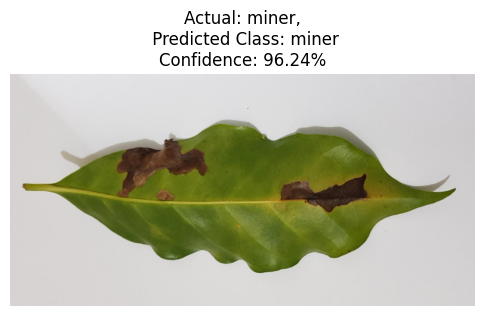

1/1 [==============================] - 0s 45ms/step


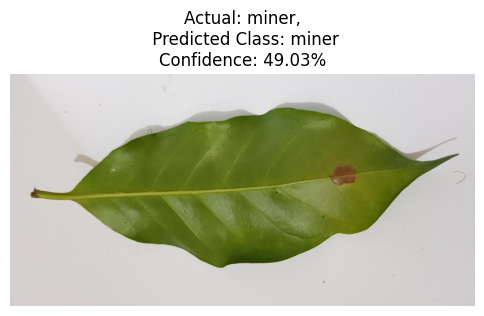

1/1 [==============================] - 0s 46ms/step


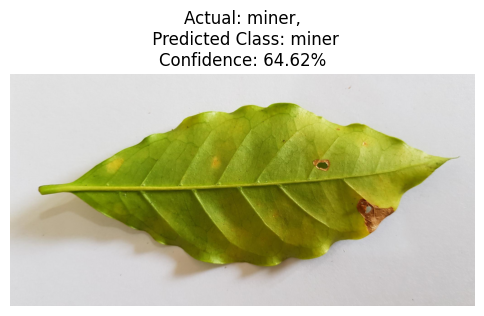

In [43]:
#testing the model

import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def predict(model, img_path, class_names):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    return predicted_class, confidence


model = tf.keras.models.load_model(r"/content/drive/MyDrive/Coffee_leaf/model_20.h5")


class_names = ['miner', 'nodisease', 'phoma', 'rust']


miner ="/content/drive/MyDrive/Coffee_leaf/test/miner"
nodisease= "/content/drive/MyDrive/Coffee_leaf/test/nodisease"
phoma="/content/drive/MyDrive/Coffee_leaf/test/phoma"
rust="/content/drive/MyDrive/Coffee_leaf/test/rust"
max_iterations=10
def classificator(image_dirteste,actual_class,max_iterations):

    iteration_count = 0
    image_dirteste = image_dirteste
    for filename in os.listdir(image_dirteste):

            if filename.endswith('.jpg'):

                image_path = os.path.join(image_dirteste, filename)


                predicted_class, confidence = predict(model, image_path, class_names)
                Actual: {actual_class}

                plt.figure(figsize=(6, 6))
                img = plt.imread(image_path)
                plt.imshow(img)
                plt.title(f"Actual: {actual_class},\n Predicted Class: {predicted_class}\nConfidence: {confidence}%")
                plt.axis('off')
                plt.show()

                iteration_count += 1


            if iteration_count >= max_iterations:
                break


classificator(miner,'miner',10)

1/1 [==============================] - 0s 43ms/step


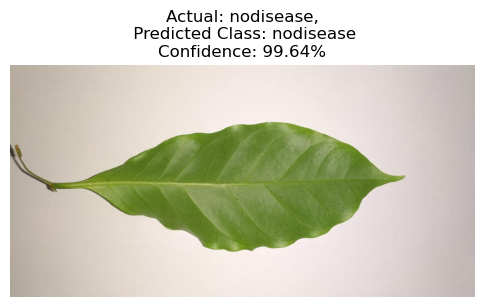

1/1 [==============================] - 0s 43ms/step


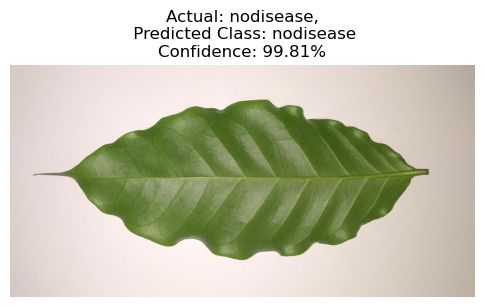

1/1 [==============================] - 0s 42ms/step


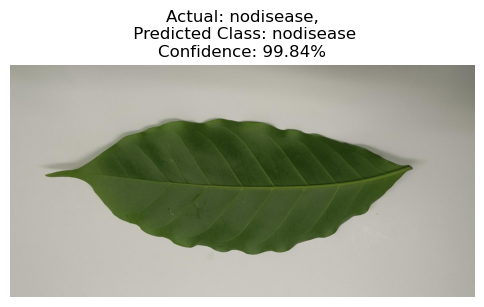

1/1 [==============================] - 0s 43ms/step


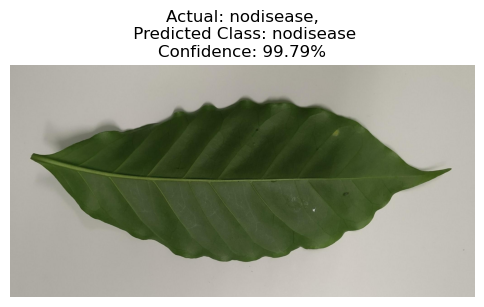

1/1 [==============================] - 0s 41ms/step


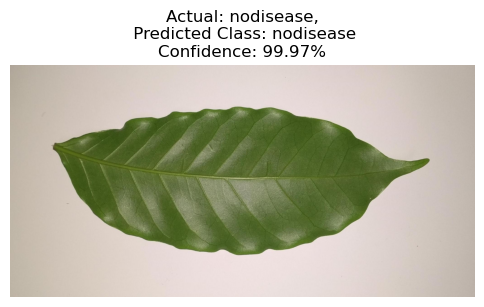

1/1 [==============================] - 0s 41ms/step


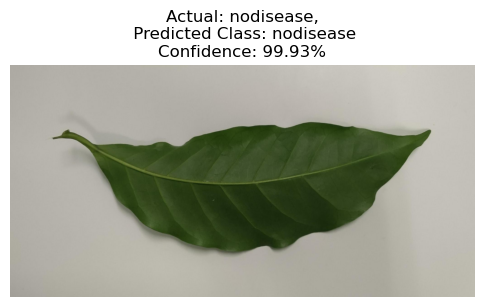

1/1 [==============================] - 0s 48ms/step


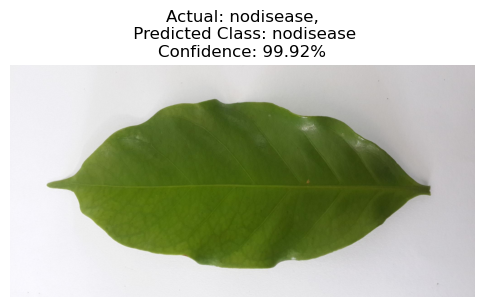

1/1 [==============================] - 0s 43ms/step


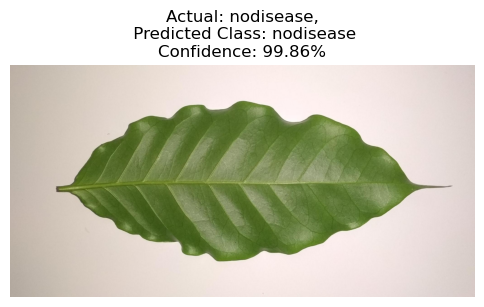

1/1 [==============================] - 0s 51ms/step


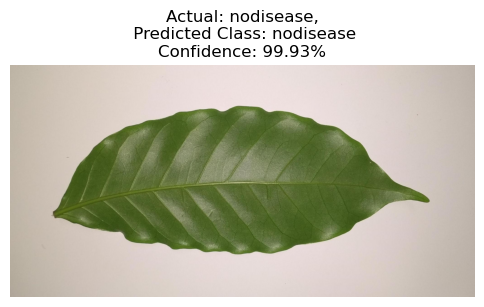

1/1 [==============================] - 0s 45ms/step


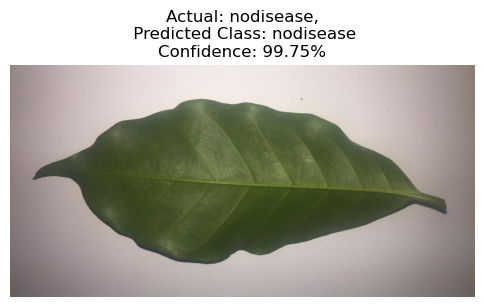

In [ ]:
classificator(nodisease,'nodisease',10)

1/1 [==============================] - 0s 42ms/step


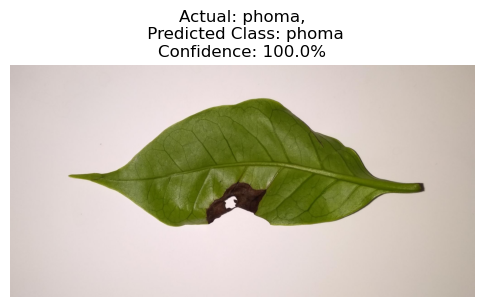

1/1 [==============================] - 0s 45ms/step


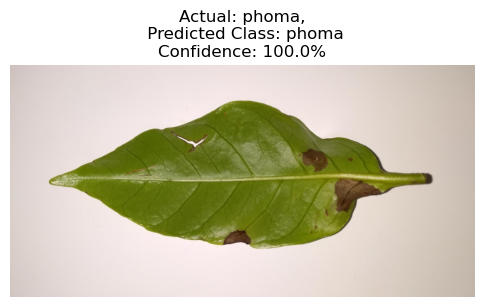

1/1 [==============================] - 0s 40ms/step


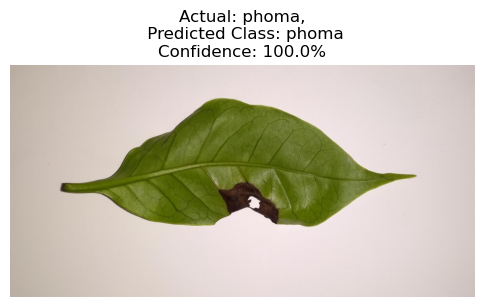

1/1 [==============================] - 0s 44ms/step


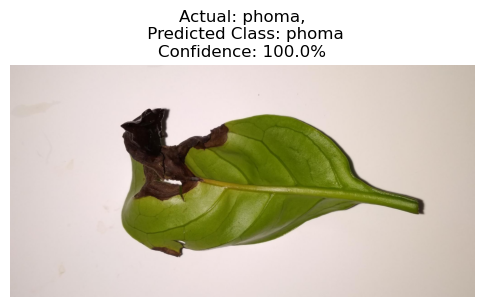

1/1 [==============================] - 0s 43ms/step


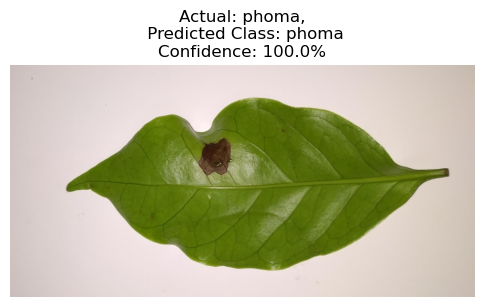

1/1 [==============================] - 0s 42ms/step


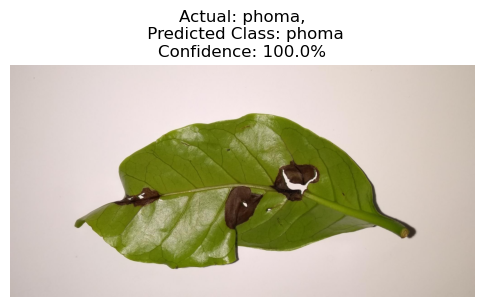

1/1 [==============================] - 0s 41ms/step


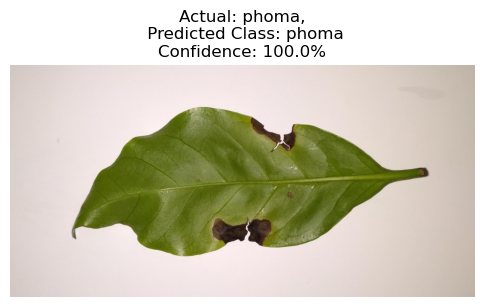

1/1 [==============================] - 0s 42ms/step


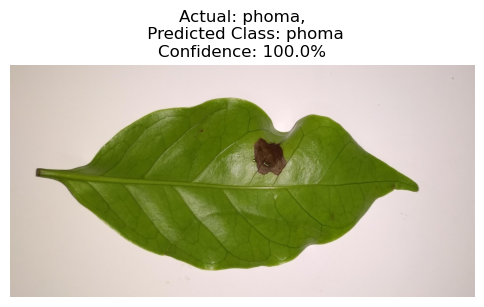

1/1 [==============================] - 0s 41ms/step


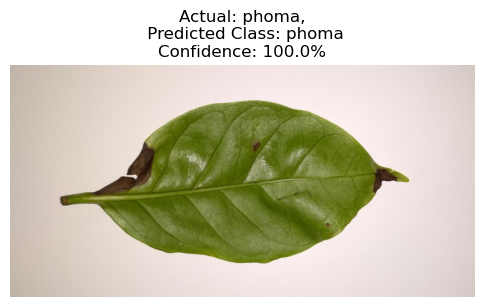

1/1 [==============================] - 0s 49ms/step


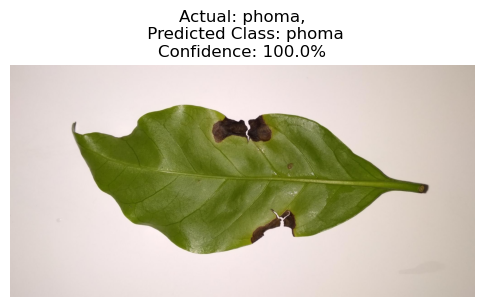

In [ ]:
classificator(phoma,'phoma',10)

1/1 [==============================] - 0s 42ms/step


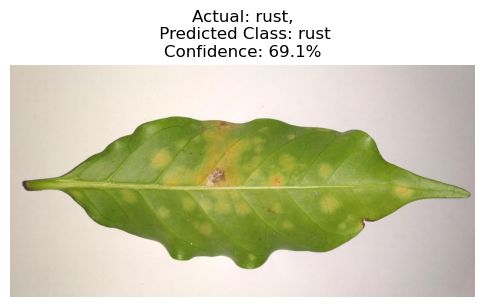

1/1 [==============================] - 0s 49ms/step


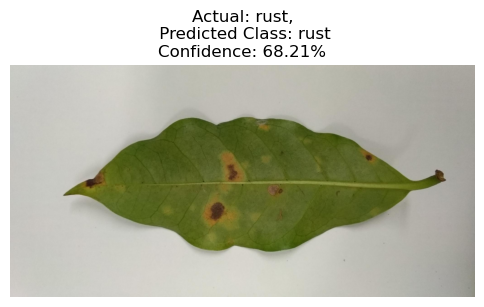

1/1 [==============================] - 0s 50ms/step


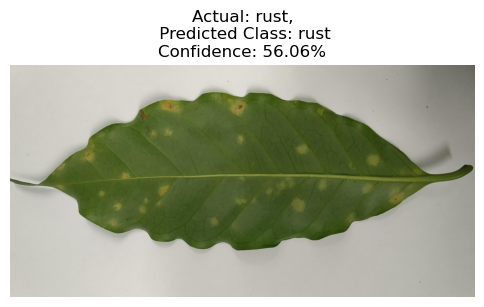

1/1 [==============================] - 0s 41ms/step


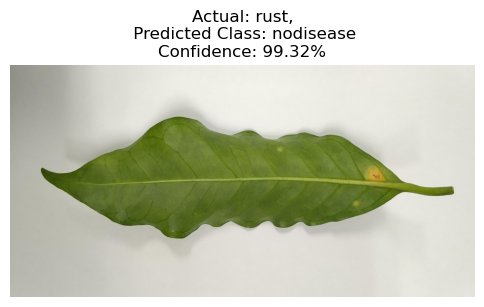

1/1 [==============================] - 0s 42ms/step


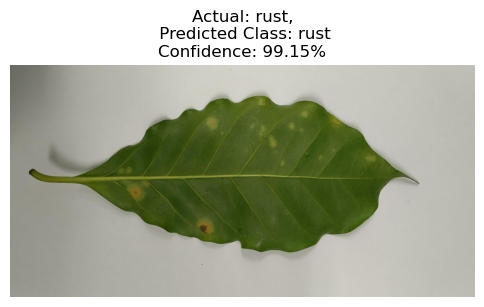

1/1 [==============================] - 0s 50ms/step


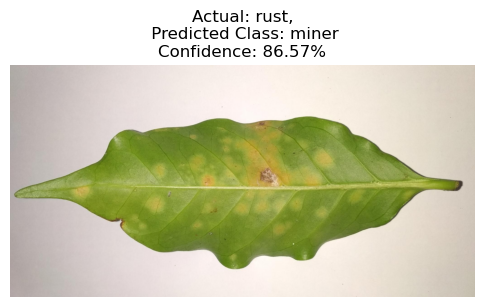

1/1 [==============================] - 0s 41ms/step


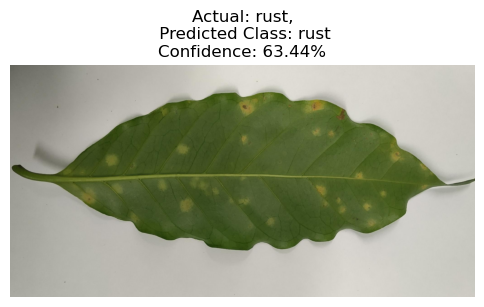

1/1 [==============================] - 0s 40ms/step


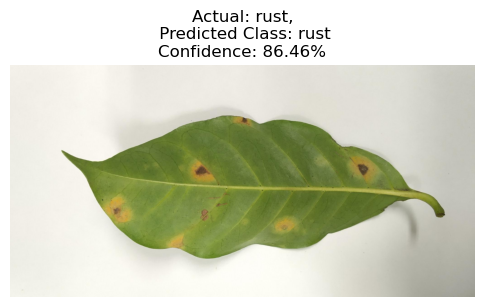

1/1 [==============================] - 0s 44ms/step


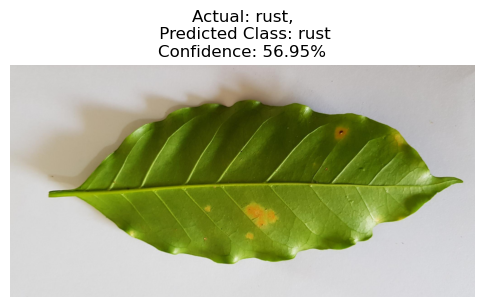

1/1 [==============================] - 0s 41ms/step


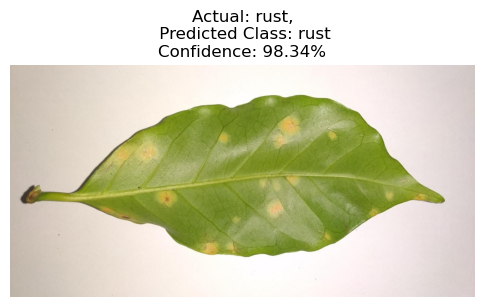

In [ ]:
classificator(rust,'rust',10)